In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [2]:
df = pd.read_csv("../../dataset/car-price.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


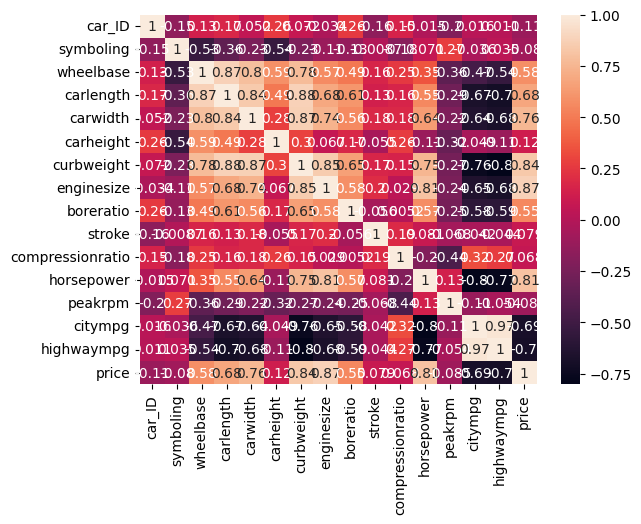

In [3]:
corr = df.select_dtypes(include=np.number).corr()
dataplot = sb.heatmap(corr, annot=True)
plt.show()

In [4]:
sb.pairplot(df, hue='price')

Text(0.5, 1.0, 'fuel type distribution')

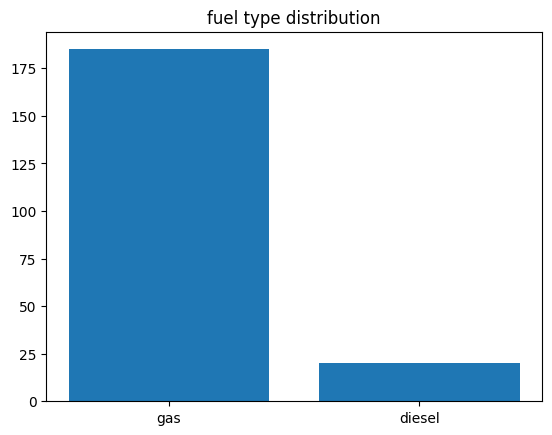

In [5]:
plt.bar(df.fueltype.unique(), df.fueltype.value_counts())
plt.title('fuel type distribution')


Text(0.5, 1.0, 'price vs horsepower')

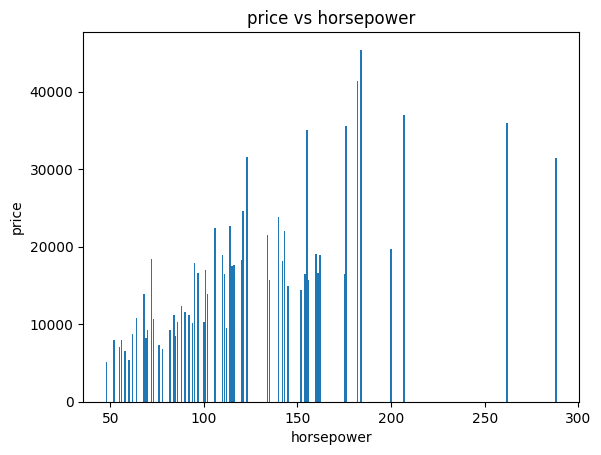

In [9]:
# plot the relationship between price and horsepower 
plt.bar(df['horsepower'], df['price'])
plt.xlabel('horsepower')
plt.ylabel('price')
plt.title('price vs horsepower')

In [ ]:
df.drop(columns = ["car_ID"], inplace = True)
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

In [ ]:
categorical_train = df_train.select_dtypes(exclude = np.number).columns

In [ ]:
categorical_test = df_test.select_dtypes(exclude = np.number).columns

In [ ]:
df1_train= df_train.copy()
classes = dict()
le = LabelEncoder()
for col in categorical_train:
    df1_train[col]= le.fit_transform(df1_train[col])
    classes[col] = le.classes_

df1_train

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
177,-1,90,1,0,0,2,1,0,102.4,175.6,...,122,4,3.31,3.54,8.7,92,4200,27,32,11248.0
75,1,45,1,1,1,2,2,0,102.7,178.4,...,140,4,3.78,3.12,8.0,175,5000,19,24,16503.0
174,-1,81,0,1,0,3,1,0,102.4,175.6,...,110,3,3.27,3.35,22.5,73,4500,30,33,10698.0
31,2,29,1,0,1,2,1,0,86.6,144.6,...,92,0,2.91,3.41,9.2,76,6000,31,38,6855.0
12,0,9,1,0,1,3,2,0,101.2,176.8,...,164,4,3.31,3.19,9.0,121,4250,21,28,20970.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1,51,1,0,1,2,2,0,99.2,178.5,...,181,4,3.43,3.27,9.0,160,5200,19,25,18399.0
14,1,11,1,0,0,3,2,0,103.5,189.0,...,164,4,3.31,3.19,9.0,121,4250,20,25,24565.0
92,1,54,1,0,0,3,1,0,94.5,165.3,...,97,1,3.15,3.29,9.4,69,5200,31,37,6849.0
179,3,87,1,0,1,2,2,0,102.9,183.5,...,171,4,3.27,3.35,9.3,161,5200,19,24,15998.0


In [ ]:
df1_test= df_test.copy()
classes = dict()
le = LabelEncoder()
for col in categorical_test:
    df1_test[col]= le.fit_transform(df1_test[col])
    classes[col] = le.classes_

df1_test

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
15,0,2,1,0,0,3,2,0,103.5,189.0,...,209,5,3.62,3.390,8.00,182,5400,16,22,30760.000
9,0,0,1,1,1,2,0,0,99.5,178.2,...,131,5,3.13,3.400,7.00,160,5500,16,22,17859.167
100,0,31,1,0,0,3,1,0,97.2,173.4,...,120,1,3.33,3.470,8.50,97,5200,27,34,9549.000
132,3,38,1,0,1,2,1,0,99.1,186.6,...,121,5,3.54,3.070,9.31,110,5250,21,28,11850.000
68,-1,5,0,1,0,4,2,0,110.0,190.9,...,183,3,3.58,3.640,21.50,123,4350,22,25,28248.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,3,17,1,0,1,2,2,0,95.3,169.0,...,70,2,3.33,3.255,9.40,101,6000,17,23,11845.000
128,3,37,1,0,1,0,2,1,89.5,168.9,...,194,5,3.74,2.900,9.50,207,5900,17,25,37028.000
76,2,21,1,0,1,2,1,0,93.7,157.3,...,92,1,2.97,3.230,9.40,68,5500,37,41,5389.000
144,0,41,1,0,0,3,0,0,97.0,172.0,...,108,1,3.62,2.640,9.00,82,4800,24,25,9233.000


In [ ]:
x_train= df1_train.drop(columns='price').values
y_train = df1_train['price'].values

x_test = df1_test.drop(columns='price').values
y_test = df1_test['price'].values


In [ ]:
scaler = StandardScaler()  

# Fit the scaler on the training data
x_train_scaled = scaler.fit_transform(x_train)

# Transform the test data
x_test_scaled = scaler.transform(x_test)

In [ ]:
model = LinearRegression() # ols
model.fit(x_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test_scaled)
y_pred[:10]

array([25270.16634717, 17666.70096856, 10112.68377389, 14688.30299824,
       26138.78850455,  6948.94633168,  8631.80535522,  7090.86513955,
       10448.8104619 ,  6990.67789452])

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [ ]:
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')

MSE: 12464382.130150536
MAE: 2404.1615569487076
R²: 0.82009823310847
